In [1]:
import math
import imageio
import PIL.Image as Img
import io
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from mpl_toolkits.mplot3d import axes3d, Axes3D
import warnings

warnings.filterwarnings('ignore')
images = []

class Drawer:
    def __init__(self, k, p, m, n, Nt):
       # self.qq = qq
        self.k = k
        self.p = p
        self.m = m
        self.n = n
        self.Nt = Nt
        self.N = 1
        self.q = (self.p - (self.k*(self.p-2) + self.n + self.m - 1)) / (self.p - 1)
        self.gamma = self.p / (self.p - 1)
        self.gamma1 = (self.p-1)/(self.k*(self.p-2) + self.n + self.m - 2)
    
    def a(self, t):
        tmp = self.k * (self.p - 2) + self.n + self.m
        natija = (self.k * self.p / (tmp - 2)) ** (self.p - 2) * (self.p + (tmp - 2) * self.N) * (t **(-1 / (tmp) - 2))
        return natija
        
    def f(self, t):
        tmp = self.k * (self.p - 2) + self.n + self.m
        m1 = -tmp / self.p
        m2 = (self.k * self.p / (tmp - 2)) ** (self.p-2)
        m3 = (m2 * (self.p + tmp - 2)) ** (self.q - 1)
        m4 = (self.k * self.p / (tmp - 2)) ** (self.p - 2)
        m5 = (self.p + tmp - 2) * self.N
        m6 = - (tmp - 2) / (self.q - 4 + self.k **2 * (self.p-2)**2 + self.n**2 + self.m ** 2)
        m7 = t ** (1/m6)
        natija = m1 * m3 * m4 * m5 * m6 * m7   
        return natija
    
    def w(self, t, x, y):
        r = np.sqrt(x**2 + y**2)
        natija = self.a(t) * ((self.f(t) - (np.abs(r)** self.gamma))** self.gamma1)
        return natija
    
    def draw(self, t, x_chap, x_ung, y_chap, y_ung, Nx, Ny):
        T = np.linspace
        xlin = T(x_chap, x_ung, Nx)
        ylin = T(y_chap, y_ung, Ny)
        X, Y = np.meshgrid(xlin, ylin)
        Z = self.w(t, X, Y)
        fig = plt.figure()
        ax = Axes3D(fig)
        ax = plt.axes(projection='3d')
        ax.set_xlim([x_chap,x_ung])
        ax.set_ylim([y_chap, y_ung])
        #ax.set_zlim([0, 3])
        ax.view_init(20, 25)
        ax.contour3D(X, Y, Z, 50, cmap='viridis')
        buf = io.BytesIO()
        plt.savefig(buf, dpi = 200)
        buf.seek(0)
        im = Img.open(buf)
        images.append(im)
        plt.clf()        
d = Drawer(k =0.9, p =3.5, m = 2.96, n =0.59, Nt = 500)
for i in np.linspace(1, 2, 5):
    d.draw(i, -1, 1, -1, 1, 100, 100)
kargs = { 'duration': 1}
imageio.mimsave('divergent.gif', images, **kargs)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

a(t = 1)=7.245173797757466, f(t = 1)=0.43670528612628867


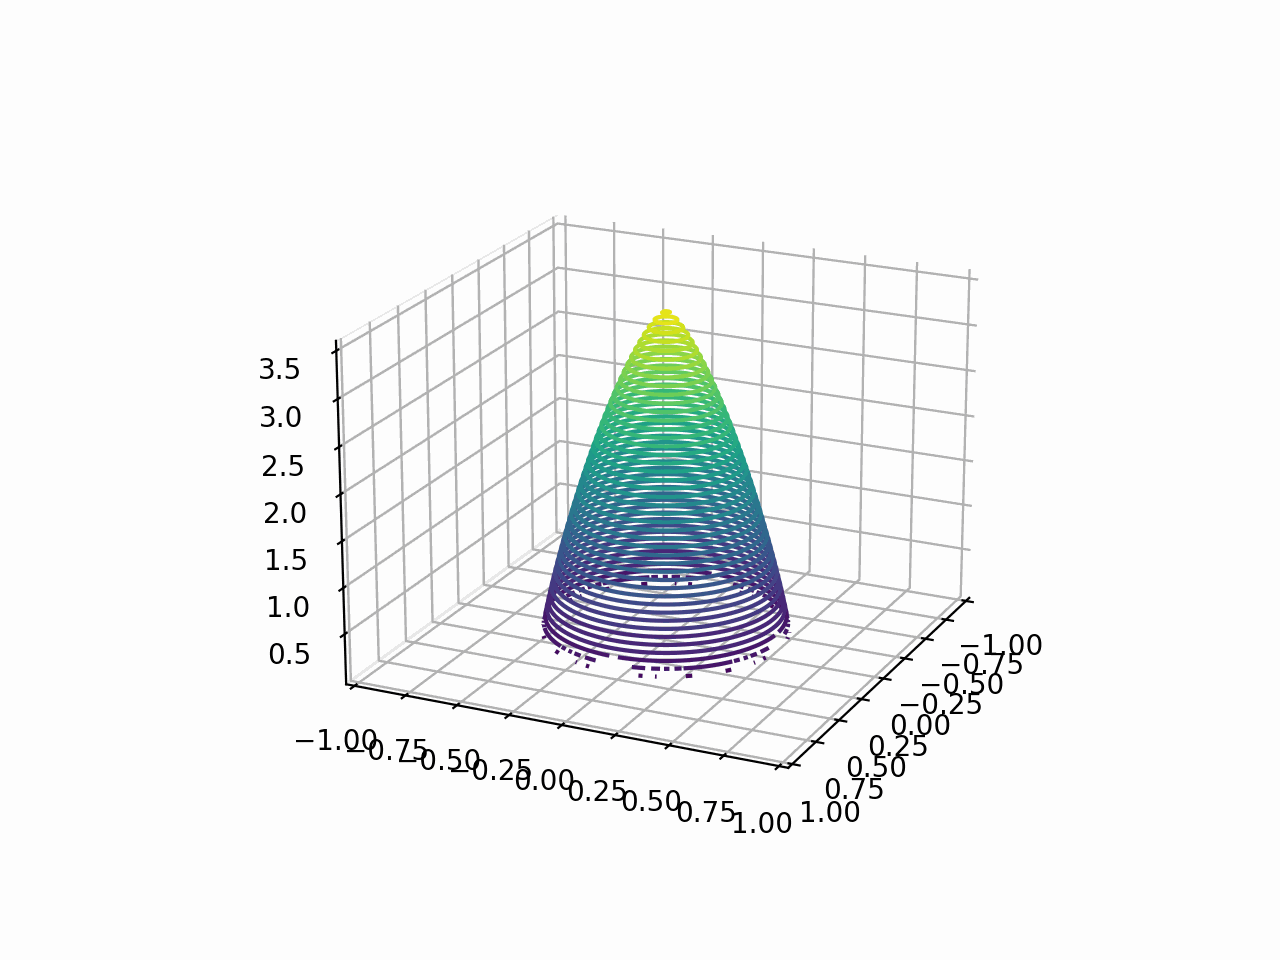

In [2]:
print("a(t = 1)={}, f(t = 1)={}".format(d.a(1), d.f(1)))
Image(filename="divergent.gif")

In [3]:
d = Drawer(k = 1.2, p = 3.5, m = 1.5, n = 1.1, Nt = 1000)
print(d.q)

0.039999999999999855


In [4]:
#print(d.gamma)

1.4


In [5]:
#print(d.gamma1)

1.0416666666666665
